In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
ticker = 'TSLA'
ticker_data = yf.Ticker(ticker)
ticker_data

yfinance.Ticker object <TSLA>

In [4]:
data = yf.download(ticker, start='2013-01-01',end='2023-01-01')
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2013-01-02 00:00:00+00:00,2.357333,2.357333,2.363333,2.314000,2.333333,17922000
2013-01-03 00:00:00+00:00,2.318000,2.318000,2.363333,2.316667,2.345333,11130000
2013-01-04 00:00:00+00:00,2.293333,2.293333,2.320000,2.261333,2.320000,10110000
2013-01-07 00:00:00+00:00,2.289333,2.289333,2.320000,2.260000,2.320000,6630000
2013-01-08 00:00:00+00:00,2.245333,2.245333,2.300000,2.207333,2.300000,19260000
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,123.150002,123.150002,128.619995,121.019997,126.370003,166989700
2022-12-27 00:00:00+00:00,109.099998,109.099998,119.669998,108.760002,117.500000,208643400


In [5]:
data = data[['Adj Close']]
data.reset_index(inplace = True)
data.columns = ['Date','Adj_Close']
data

,Date,Adj_Close
0,2013-01-02 00:00:00+00:00,2.357333
1,2013-01-03 00:00:00+00:00,2.318000
2,2013-01-04 00:00:00+00:00,2.293333
3,2013-01-07 00:00:00+00:00,2.289333
4,2013-01-08 00:00:00+00:00,2.245333
...,...,...
2513,2022-12-23 00:00:00+00:00,123.150002
2514,2022-12-27 00:00:00+00:00,109.099998
2515,2022-12-28 00:00:00+00:00,112.709999
2516,2022-12-29 00:00:00+00:00,121.820000


In [6]:
daily_returns = [None]
for i in range(1, len(data)):
  per_change = (data['Adj_Close'][i] - data['Adj_Close'][i-1])/data['Adj_Close'][i-1]
  daily_returns.append(per_change)
daily_returns

[None,
 -0.016685325148616353,
 -0.01064151155316945,
 -0.0017441638035641364,
 -0.019219635917297348,
 -0.0011873502074677342,
 -0.0032702108887891226,
 -0.018490739751181408,
 0.010634946491112062,
 0.019242446024367945,
 0.005899593918300704,
 0.00821128363249275,
 0.004071943740706279,
 0.019409188717108228,
 0.02301796259429907,
 0.027499992549419698,
 -0.00027051709758938136,
 0.028393703272885384,
 -0.0021034502960657073,
 -0.011330819540786964,
 -0.0002662192886311782,
 0.021060759734560272,
 -0.014621285583626804,
 0.010333872238914365,
 0.027274916030610243,
 0.007914378194867323,
 -0.006079039745609547,
 -0.020897170228408833,
 -0.013794738513204261,
 0.014779497739082109,
 -0.0046814377069847105,
 -0.03214006903611285,
 0.06047542307316127,
 -0.018839284616858857,
 -0.08770095922967655,
 0.027019109797548662,
 -0.04790897096449411,
 0.001454124448878096,
 0.01945992468935293,
 -0.007692259883189156,
 -0.0051679947395949595,
 0.02683984319281912,
 0.030072905627955043,
 0.02

In [7]:
data['Daily_Returns'] = daily_returns
data

<ipython-input-7-b28b910471df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily_Returns'] = daily_returns


,Date,Adj_Close,Daily_Returns
0,2013-01-02 00:00:00+00:00,2.357333,NaN
1,2013-01-03 00:00:00+00:00,2.318000,-0.016685
2,2013-01-04 00:00:00+00:00,2.293333,-0.010642
3,2013-01-07 00:00:00+00:00,2.289333,-0.001744
4,2013-01-08 00:00:00+00:00,2.245333,-0.019220
...,...,...,...
2513,2022-12-23 00:00:00+00:00,123.150002,-0.017551
2514,2022-12-27 00:00:00+00:00,109.099998,-0.114089
2515,2022-12-28 00:00:00+00:00,112.709999,0.033089
2516,2022-12-29 00:00:00+00:00,121.820000,0.080827


In [8]:
data.dropna(inplace=True)
data.head()

<ipython-input-8-305667f40e0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Date,Adj_Close,Daily_Returns
1,2013-01-03 00:00:00+00:00,2.318000,-0.016685
2,2013-01-04 00:00:00+00:00,2.293333,-0.010642
3,2013-01-07 00:00:00+00:00,2.289333,-0.001744
4,2013-01-08 00:00:00+00:00,2.245333,-0.019220
5,2013-01-09 00:00:00+00:00,2.242667,-0.001187


In [9]:
!pip install hmmlearn numpy

In [10]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

returns = data['Daily_Returns'].values
returns = returns.reshape(-1, 1)
returns

array([[-0.01668533],
       [-0.01064151],
       [-0.00174416],
       ...,
       [ 0.03308892],
       [ 0.08082691],
       [ 0.01116402]])

In [11]:
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state = 42)
model.fit(returns)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=42)

In [12]:
hidden_states = model.predict(returns)
data['Hidden_State'] = hidden_states
data.head()

<ipython-input-12-b41bcee4ea3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hidden_State'] = hidden_states


,Date,Adj_Close,Daily_Returns,Hidden_State
1,2013-01-03 00:00:00+00:00,2.318000,-0.016685,0
2,2013-01-04 00:00:00+00:00,2.293333,-0.010642,0
3,2013-01-07 00:00:00+00:00,2.289333,-0.001744,0
4,2013-01-08 00:00:00+00:00,2.245333,-0.019220,0
5,2013-01-09 00:00:00+00:00,2.242667,-0.001187,0


In [13]:
for state in range(model.n_components):
  print(f"Hidden State {state}")
  print(f"Mean: {model.means_[state][0]}")
  print(f"Variance: {np.diag(model.covars_[state])[0]}")

Hidden State 0
Mean: 0.0016662390177347975
Variance: 0.0005009694246348507
Hidden State 1
Mean: 0.003860095368953129
Variance: 0.0036981541423089766


In [14]:
!pip install matplotlib

In [15]:
import matplotlib.pyplot as plt

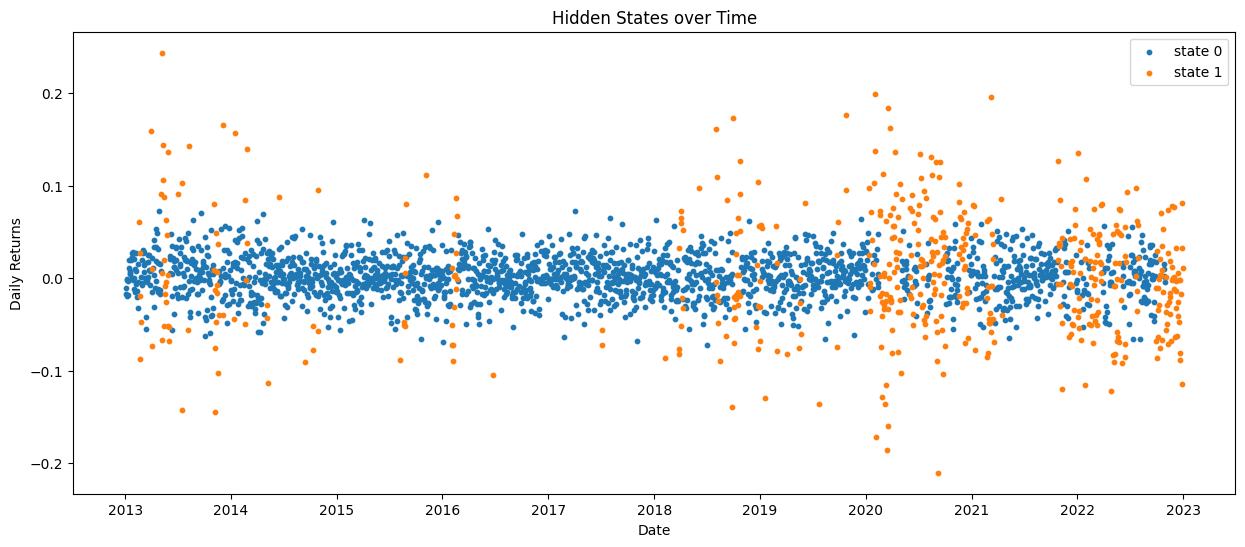

In [16]:
plt.figure(figsize=(15,6))
for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.scatter(data['Date'][mask], data['Daily_Returns'][mask], label=f"state {state}", s=10)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Hidden States over Time")
plt.show()

In [17]:
print("Transition Matrix:")
print(model.transmat_)


Transition Matrix:
[[0.93639729 0.06360271]
 [0.18880151 0.81119849]]


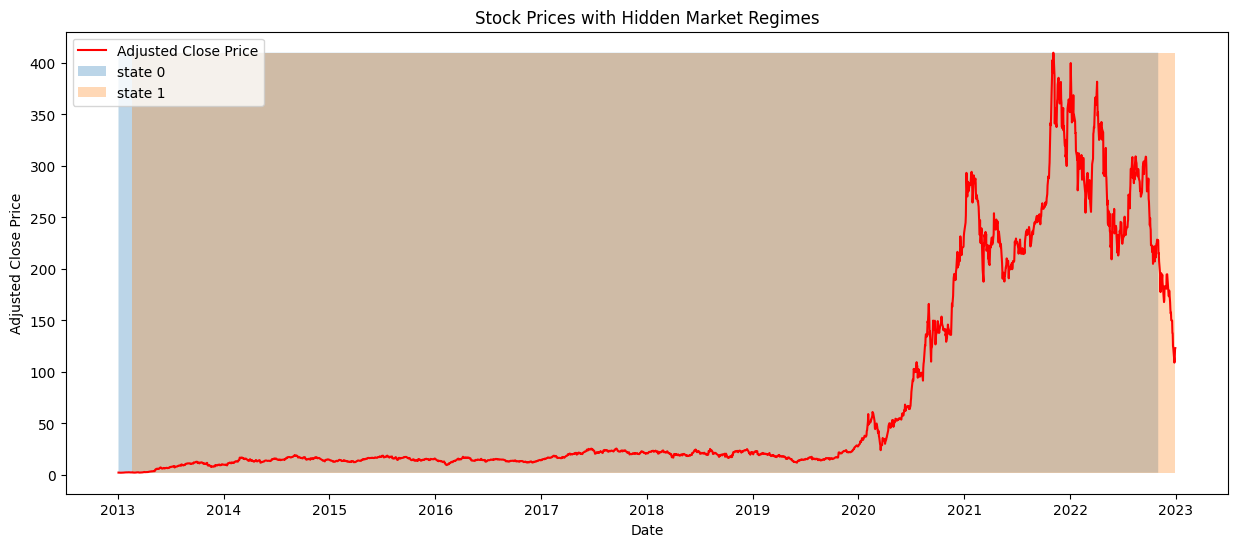

In [18]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Adj_Close'], label='Adjusted Close Price', color='red')

for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.fill_between(data['Date'][mask], data['Adj_Close'].min(), data['Adj_Close'].max(), alpha=0.3, label=f"state {state}")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Prices with Hidden Market Regimes")
plt.show()

In [19]:
curr_state = hidden_states[-1]
next_state_probability = model.transmat_[curr_state]
next_state = np.argmax(next_state_probability)

print(f"Current State: {curr_state}")
print(f"Transition probabilities: {next_state_probability}")
print(f"Next State: {next_state}")

Current State: 1
Transition probabilities: [0.18880151 0.81119849]
Next State: 1


# Predicting Bull or Bear in 2 state model

In [20]:
state_labels = []
for state in range(model.n_components):
  state_mean = model.means_[state][0]
  state_variance = np.diag(model.covars_[state][0])
  if state_mean > 0 and state_variance<0.001:
    state_label = 'Bull'
  elif state_mean<0:
    state_label = 'Bear'
  else:
    state_label = 'Neutral'
  state_labels.append(state_label)

data['Market_type'] = data['Hidden_State'].apply(lambda x: state_labels[x])
print(data[['Date', 'Adj_Close', 'Daily_Returns', 'Hidden_State', 'Market_type']].head())


                       Date  Adj_Close  Daily_Returns  Hidden_State  \
1 2013-01-03 00:00:00+00:00   2.318000      -0.016685             0   
2 2013-01-04 00:00:00+00:00   2.293333      -0.010642             0   
3 2013-01-07 00:00:00+00:00   2.289333      -0.001744             0   
4 2013-01-08 00:00:00+00:00   2.245333      -0.019220             0   
5 2013-01-09 00:00:00+00:00   2.242667      -0.001187             0   

  Market_type  
1        Bull  
2        Bull  
3        Bull  
4        Bull  
5        Bull  


<ipython-input-20-3271739a3fe9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market_type'] = data['Hidden_State'].apply(lambda x: state_labels[x])


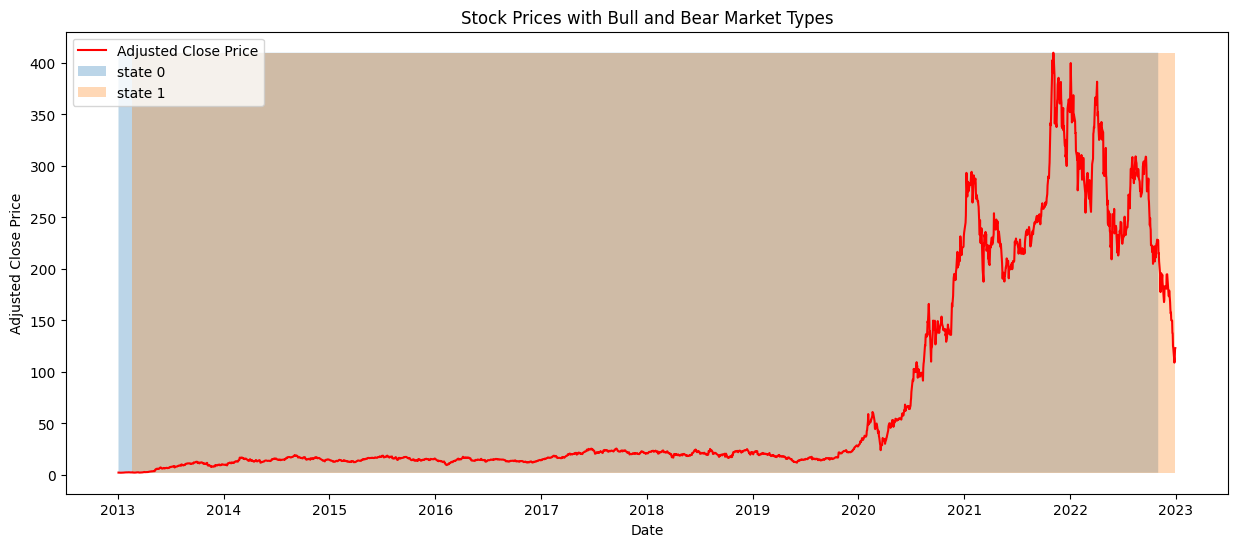

In [21]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Adj_Close'], label='Adjusted Close Price', color='red')
for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.fill_between(data['Date'][mask], data['Adj_Close'].min(), data['Adj_Close'].max(), alpha=0.3, label=f"state {state}")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Prices with Bull and Bear Market Types")
plt.show()

# Trying with 3 hidden state

In [22]:
model_3 = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state = 42)
model_3.fit(returns)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000,
            random_state=42)

In [23]:
hidden_states = model_3.predict(returns)
data['Hidden_State'] = hidden_states
data.head()

<ipython-input-23-cda5d5c2f674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hidden_State'] = hidden_states


,Date,Adj_Close,Daily_Returns,Hidden_State,Market_type
1,2013-01-03 00:00:00+00:00,2.318000,-0.016685,1,Bull
2,2013-01-04 00:00:00+00:00,2.293333,-0.010642,0,Bull
3,2013-01-07 00:00:00+00:00,2.289333,-0.001744,1,Bull
4,2013-01-08 00:00:00+00:00,2.245333,-0.019220,0,Bull
5,2013-01-09 00:00:00+00:00,2.242667,-0.001187,1,Bull


In [24]:
for state in range(model_3.n_components):
  print(f"Hidden State {state}")
  print(f"Mean: {model_3.means_[state][0]}")
  print(f"Variance: {np.diag(model_3.covars_[state])[0]}")

Hidden State 0
Mean: 0.003270092530243032
Variance: 0.00045241104402227996
Hidden State 1
Mean: -0.00011902837878917449
Variance: 0.0005850712022438038
Hidden State 2
Mean: 0.004317424307910806
Variance: 0.003718034587010837


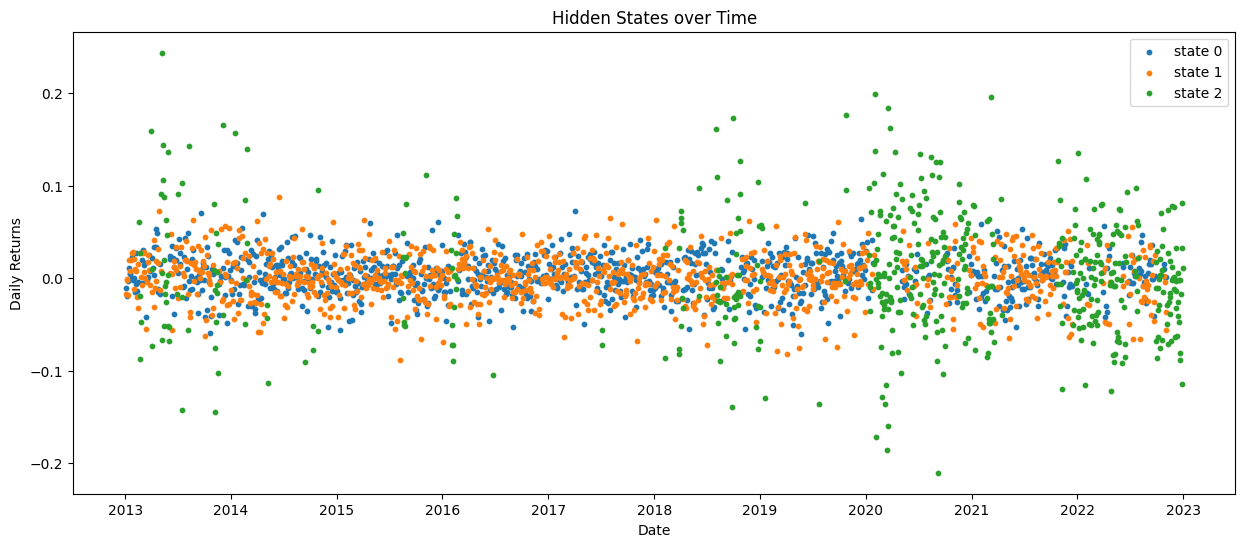

In [25]:
plt.figure(figsize=(15,6))
for state in range(model_3.n_components):
  mask = (data['Hidden_State'] == state)
  plt.scatter(data['Date'][mask], data['Daily_Returns'][mask], label=f"state {state}", s=10)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Hidden States over Time")
plt.show()

In [26]:
print("Transition Matrix:")
print(model_3.transmat_)


Transition Matrix:
[[2.67602824e-03 9.96988504e-01 3.35467749e-04]
 [8.76710761e-01 1.34435823e-02 1.09845657e-01]
 [1.14757085e-01 5.78382843e-02 8.27404630e-01]]


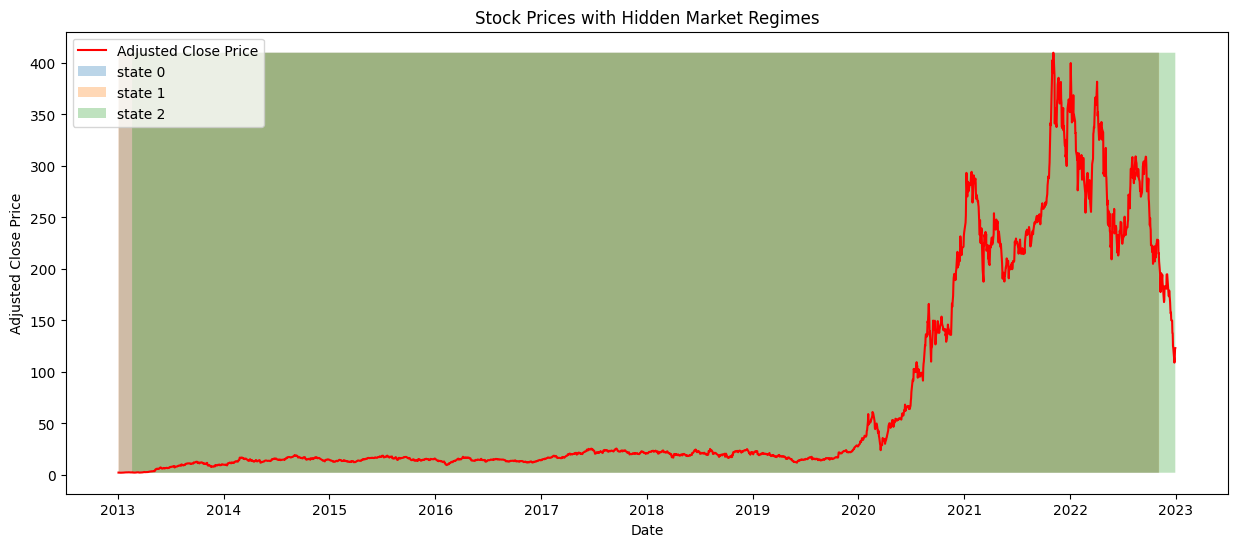

In [27]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Adj_Close'], label='Adjusted Close Price', color='red')

for state in range(model_3.n_components):
  mask = (data['Hidden_State'] == state)
  plt.fill_between(data['Date'][mask], data['Adj_Close'].min(), data['Adj_Close'].max(), alpha=0.3, label=f"state {state}")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Prices with Hidden Market Regimes")
plt.show()

In [28]:
curr_state = hidden_states[-1]
next_state_probability = model_3.transmat_[curr_state]
next_state = np.argmax(next_state_probability)

print(f"Current State: {curr_state}")
print(f"Transition probabilities: {next_state_probability}")
print(f"Next State: {next_state}")

Current State: 2
Transition probabilities: [0.11475709 0.05783828 0.82740463]
Next State: 2
